Lab09 - XOR. Logistic Regression - Eager Execution
 * XOR문제를 Deep Neural Network을 통해 풀어보고, Tensorboard에 출력해 보도록 하겠습니다.

# 기본 Library 선언 및 Tensorflow 버전 확인

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)
tf.__version__

'2.3.1'

# 강의 Data
 * x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data를 0과 1로 구분하는 예제입니다.
 * 붉은색과 푸른색으로 0과 1을 표시해보도록 하겠습니다.

Text(0, 0.5, 'x2')

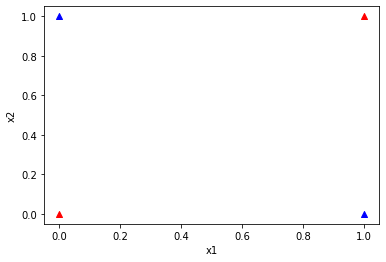

In [13]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1],c='red',marker='^')
plt.scatter(x_data[3][0],x_data[3][1],c='red',marker='^')
plt.scatter(x_data[1][0],x_data[1][1],c='blue',marker='^')
plt.scatter(x_data[2][0],x_data[2][1],c='blue',marker='^')

plt.xlabel('x1')
plt.ylabel('x2')

# Tensorboard

위 Data를 기준으로 XOR처리를 위한 모델을 만들도록 하겠습니다.

 * 위의 Data를 4Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다.
 * Tensorboard --logdir=./logs/ 실행합니다.
 * summary값을 logs폴더에 저정하고 아래 명령어로 실행해서 확인한다.(http://0.0.0.0:6006)

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data)).batch(len(x_data))

def preprocess_data(features,labels):
    features = tf.cast(features,tf.float32)
    labels = tf.cast(labels,tf.float32)
    return features, labels

 * summary값을 logs폴더에 저장하고 아래 명령어로 실행해서 확인한다. (http://0.0.0.0:6006)
 * tensorboard --logdir=./logs/xor

In [15]:
log_path = './logs/xor'
writer = tf.summary.create_file_writer(log_path)

Deep Neural Network를 통해 XOR해결

 * 위의 Data를 4Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다.
 * 각각의 값을 Histogram으로 Tensorboard에 저장한다. (Model)
 * 각각의 값을 Scalar값으로 Tensorboard에 저장한다. (Cost, Accuracy)

In [16]:
W1 = tf.Variable(tf.random.normal((2,10)),name='weight1')
b1 = tf.Variable(tf.random.normal((10,)),name='bias1')

W2 = tf.Variable(tf.random.normal((10,10)),name='weight2')
b2 = tf.Variable(tf.random.normal((10,)),name='bias2')

W3 = tf.Variable(tf.random.normal((10,10)),name='weight3')
b3 = tf.Variable(tf.random.normal((10,)),name='bias3')

W4 = tf.Variable(tf.random.normal((10,1)),name='weight4')
b4 = tf.Variable(tf.random.normal((1,)),name='bias4')

def neural_net(features,step):
    layer1 = tf.sigmoid(tf.matmul(features,W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2)
    layer3 = tf.sigmoid(tf.matmul(layer2,W3) + b3)
    hypothesis = tf.sigmoid(tf.matmul(layer3,W4) + b4)
    
    with writer.as_default():
        tf.summary.histogram('weights1',W1,step=step)
        tf.summary.histogram('biases1',b1,step=step)
        tf.summary.histogram('layer1',layer1,step=step)
        
        tf.summary.histogram('weights2',W2,step=step)
        tf.summary.histogram('biases2',b2,step=step)
        tf.summary.histogram('layer2',layer2,step=step)
        
        tf.summary.histogram('weights3',W3,step=step)
        tf.summary.histogram('biases3',b3,step=step)
        tf.summary.histogram('layer3',layer3,step=step)
        
        tf.summary.histogram('weights4',W4,step=step)
        tf.summary.histogram('biases',b4,step=step)
        tf.summary.histogram('hypothesis',hypothesis,step=step)
    return hypothesis

def loss_fn(hypothesis,labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1-labels) * tf.math.log(1-hypothesis))
    with writer.as_default():
        tf.summary.scalar('loss',cost,step=step)
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def accuracy_fn(hypothesis,labels):
    predicted = tf.cast(hypothesis > 0.5,dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.float32))
    return accuracy

def grad(hypothesis,features,labels,step):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features,step),labels)
    return tape.gradient(loss_value,[W1,W2,W3,W4,b1,b2,b3,b4])

In [17]:
epochs = 3000

for step in range(epochs):
    for features, labels in dataset:
        features, labels = preprocess_data(features,labels)
        grads = grad(neural_net(features,step),features,labels,step)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1,W2,W3,W4,b1,b2,b3,b4]))
        if step % 50 == 0:
            loss_value = loss_fn(neural_net(features,step),labels)
            print('iter: {},Loss: {:.4f}'.format(step,loss_value))

x_data, y_data = preprocess_data(x_data,y_data)
test_acc = accuracy_fn(neural_net(x_data,step),y_data)
print('Testset Accuracy: {:.4f}'.format(test_acc))

iter: 0,Loss: 0.9517
iter: 50,Loss: 0.6936
iter: 100,Loss: 0.6923
iter: 150,Loss: 0.6912
iter: 200,Loss: 0.6901
iter: 250,Loss: 0.6890
iter: 300,Loss: 0.6879
iter: 350,Loss: 0.6867
iter: 400,Loss: 0.6855
iter: 450,Loss: 0.6842
iter: 500,Loss: 0.6827
iter: 550,Loss: 0.6811
iter: 600,Loss: 0.6793
iter: 650,Loss: 0.6772
iter: 700,Loss: 0.6749
iter: 750,Loss: 0.6722
iter: 800,Loss: 0.6690
iter: 850,Loss: 0.6654
iter: 900,Loss: 0.6611
iter: 950,Loss: 0.6561
iter: 1000,Loss: 0.6502
iter: 1050,Loss: 0.6432
iter: 1100,Loss: 0.6349
iter: 1150,Loss: 0.6251
iter: 1200,Loss: 0.6134
iter: 1250,Loss: 0.5992
iter: 1300,Loss: 0.5821
iter: 1350,Loss: 0.5612
iter: 1400,Loss: 0.5357
iter: 1450,Loss: 0.5047
iter: 1500,Loss: 0.4677
iter: 1550,Loss: 0.4248
iter: 1600,Loss: 0.3774
iter: 1650,Loss: 0.3281
iter: 1700,Loss: 0.2798
iter: 1750,Loss: 0.2356
iter: 1800,Loss: 0.1971
iter: 1850,Loss: 0.1649
iter: 1900,Loss: 0.1385
iter: 1950,Loss: 0.1173
iter: 2000,Loss: 0.1003
iter: 2050,Loss: 0.0865
iter: 2100,Loss

(Optional) Jupyter Notebook에서 Tensorboard 실행하기

In [18]:
# Load the Tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
'''Start TensorBoard through the command line or within a notebook experience. 
The two interfaces are generally the same. In notebooks, use the %tensorboard line magic. 
On the command line, run the same command without "%".'''

%tensorboard --logdir logs/xor

Reusing TensorBoard on port 6006 (pid 3780), started 0:04:37 ago. (Use '!kill 3780' to kill it.)